In [45]:
import matplotlib.pyplot as plt
import networkx as nx
import random

In [46]:
def map_drawing(delete, N=5):
    exeption = (N - 1) ** 2

    if delete > exeption:
        print("Ви ввели число більше допустимого! Граф не буде зв\'язвним.")
    else:
        global G
        global pos
        G = nx.grid_2d_graph(N, N)
        pos = dict((n, n) for n in G.nodes())
        nx.draw_networkx(G, pos=pos, with_labels=False, node_size=300, node_color="PaleGreen")
        plt.show()

        while delete > 0:
            edges = list(G.edges)
            chosen_edge = random.choice(edges)
            G.remove_edge(chosen_edge[0], chosen_edge[1])

            if nx.is_connected(G):
                delete -= 1
            else:
                G.add_edge(chosen_edge[0], chosen_edge[1])
        nx.draw_networkx(G, pos=pos, with_labels=False, node_size=300, node_color="PaleGreen")
        plt.show()

In [47]:
def achieve_goal(x, y, i, j):
    try:
        active = (x, y)
        start = active
        finish = (i, j)

        visited = {node: False for node in G.nodes}
        stack = [start]
        result = []
        colors = {start: "PaleGreen", finish: "Red"}
        while stack:
            nx.draw_networkx(G, pos=pos, with_labels=False, nodelist=colors,
                                 node_color=colors.values(), node_size=300)
            plt.show()
            curently = stack.pop()
            if not visited[curently]:
                result.append(curently)
                visited[curently] = True
                colors[(0,0)] = "PaleGreen"
                colors[curently] = 'black'
            for node in G.neighbors(curently):
                if not visited[node]:
                    stack.append(node)
            if finish in result:
                break
    except:
        print("Помилка вводу координат")

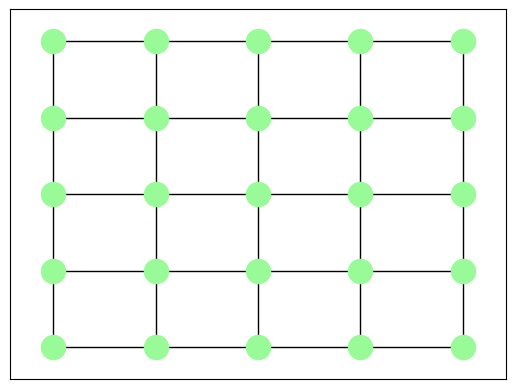

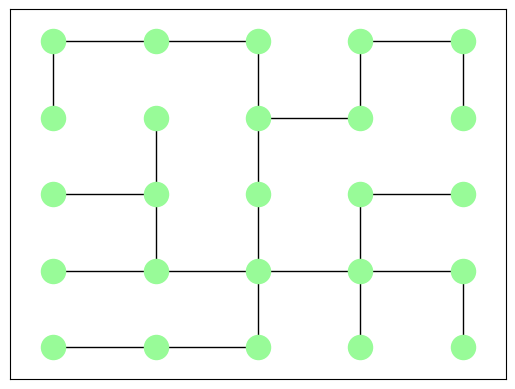

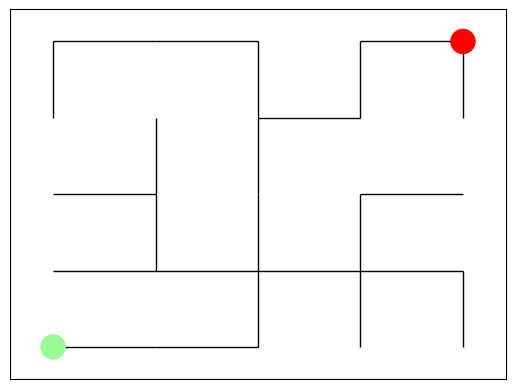

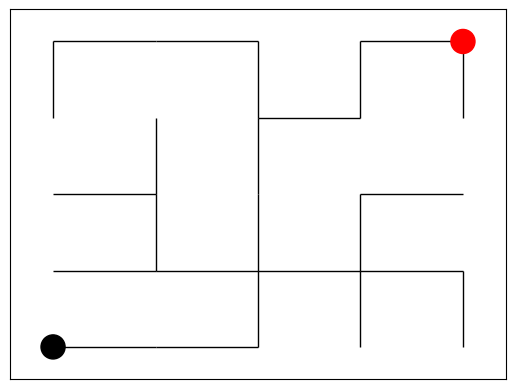

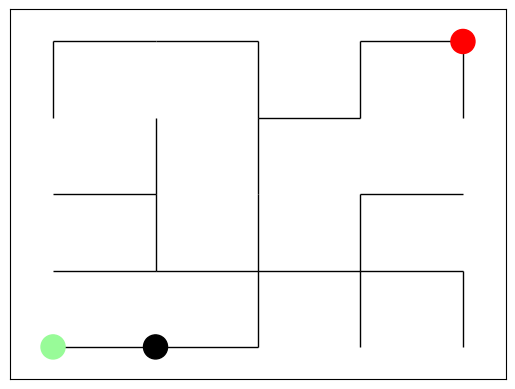

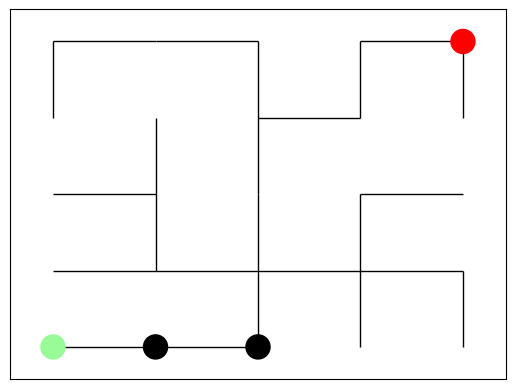

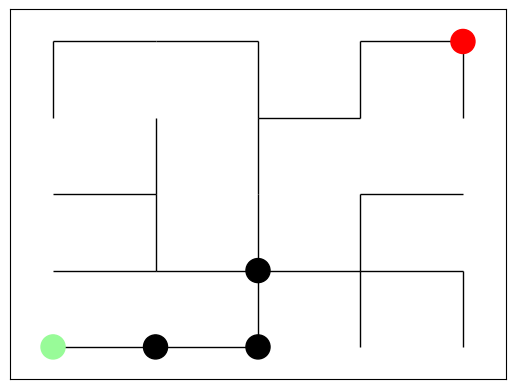

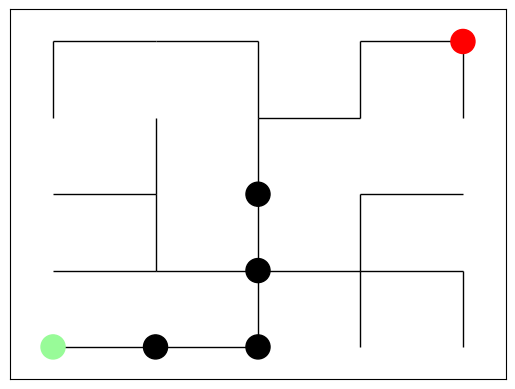

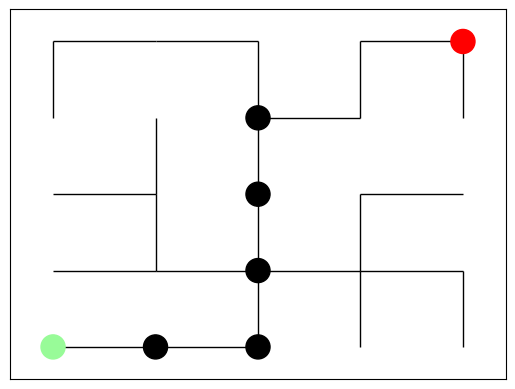

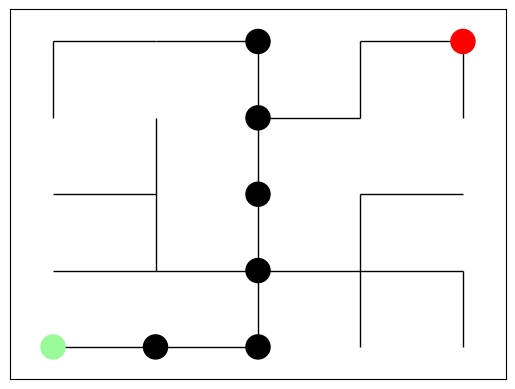

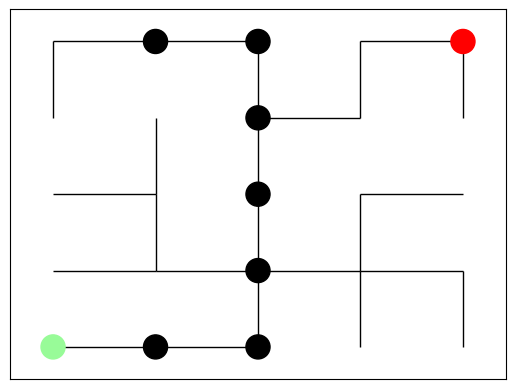

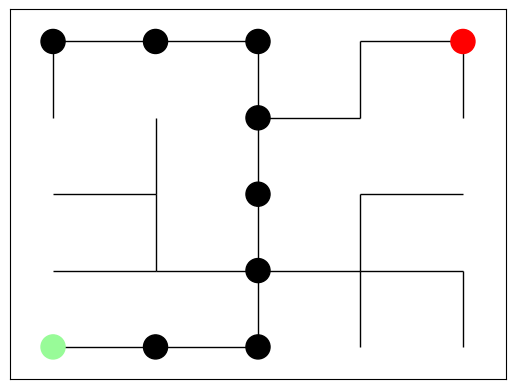

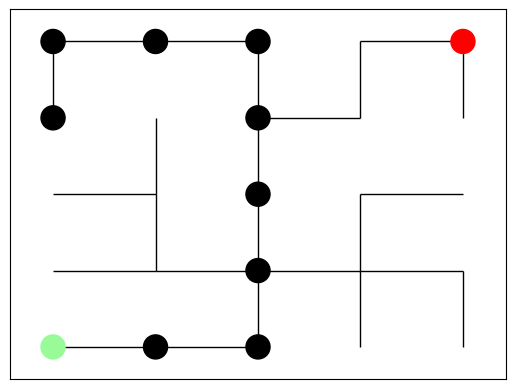

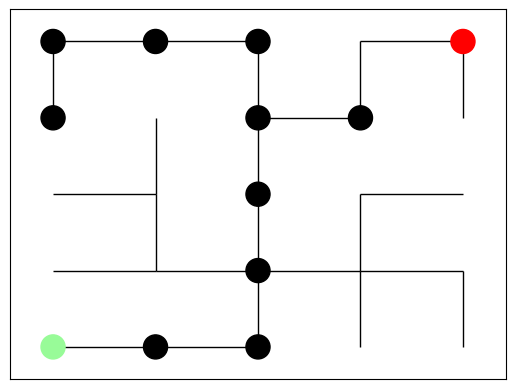

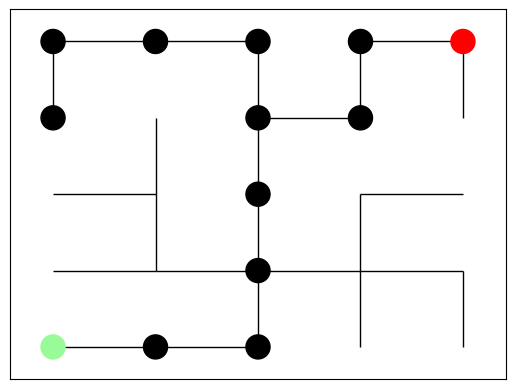

In [48]:
if __name__ == '__main__':
    N = int(input("Введіть розмірність матриці: "))
    delete = int(input("Введіть кількість ребер на видалення: "))
    x = int(input("Введіть координату початку пошуку(x, y) x: "))
    y = int(input("Введіть координату початку пошуку(x, y) y: "))
    i = int(input("Введіть координату фінішу(i, j) i: "))
    j = int(input("Введіть координату фінішу(i, j) j: "))

    map_drawing(delete, N)
    achieve_goal(x, y, i, j)